<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [140]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read thru the documentation to accomplish this task. 

`Tip:` You will need to install the `bs4` library inside your conda environment. 

In [141]:
from bs4 import BeautifulSoup
import requests

df = pd.read_csv('data/job_listings.csv')  
df['text'] = df['description'].apply(lambda x: BeautifulSoup(x).get_text())

In [142]:
df['text'] = [re.sub(r'[^a-zA-Z ^0-9]', '', row) for row in df['text']]
# row = [row.splitlines() for row in df['text']]

In [143]:
df['text'][0]

'bJob RequirementsnConceptual understanding in Machine Learning models like Naixc2xa8ve Bayes KMeans SVM Apriori Linear Logistic Regression Neural Random Forests Decision Trees KNN along with handson experience in at least 2 of themnIntermediate to expert level coding skills in PythonR Ability to write functions clean and efficient data manipulation are mandatory for this rolenExposure to packages like NumPy SciPy Pandas Matplotlib etc in Python or GGPlot2 dplyr tidyR in RnAbility to communicate Model findings to both Technical and NonTechnical stake holdersnHands on experience in SQLHive or similar programming languagenMust show past work via GitHub Kaggle or any other published articlenMasters degree in StatisticsMathematicsComputer Science or any other quant specific fieldnApply Now'

## 2) Use Spacy to tokenize the listings 

In [144]:
nlp = spacy.load('en_core_web_sm')

In [145]:
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = English()

# Create a blank Tokenizer with just the English vocab
tokenizer = Tokenizer(nlp.vocab)

In [161]:
tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(df['text'], batch_size=500):
    doc_tokens = []
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
    tokens.append(doc_tokens)

df['tokens'] = tokens

In [162]:
df['tokens'].head()

0    [bjob, requirementsnconceptual, understanding,...
1    [bjob, descriptionnnas, data, scientist, 1, he...
2    [bas, data, scientist, working, consulting, bu...
3    [b4969,  , 6756, monthcontractunder, general, ...
4    [blocation, usa, xe2x80x93, multiple, location...
Name: tokens, dtype: object

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [163]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
for text in df['tokens']:
    vect.fit(text)
    
dtm = vect.transform(text)

In [164]:
print(vect.get_feature_names())

['25000', '35', 'accordance', 'achieve', 'action', 'additional', 'advanced', 'age', 'agile', 'aim', 'algorithm', 'algorithms', 'allowed', 'ambitious', 'analysis', 'analytic', 'analytical', 'analytics', 'ancestry', 'andor', 'annual', 'applied', 'applying', 'appropriate', 'areanwilling', 'assets', 'assistance', 'association', 'authorized', 'available', 'avronexperience', 'background', 'based', 'bcerner', 'best', 'biostatistics', 'brightest', 'business', 'care', 'careers', 'cassandra', 'category', 'cerner', 'check', 'citizenship', 'client', 'clientfacing', 'clients', 'clinical', 'cluster', 'clustering', 'collections', 'color', 'complexity', 'comply', 'compromises', 'computational', 'computer', 'computingnpreferred', 'confidence', 'contextual', 'corporate', 'corporation', 'couch', 'countries', 'countriesnncernerxe2x80x99s', 'creating', 'currently', 'data', 'databases', 'datadriven', 'db', 'decision', 'degree', 'develop', 'developing', 'development', 'directly', 'disability', 'discover', 'd

In [165]:
# Get word counts for each doc
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [166]:
dtm.tail()

,25000,35,accordance,achieve,action,additional,advanced,age,agile,aim,...,visa,visually,warehousing,willing,work,workflow,working,workplace,xe2x80x93,years
374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
378,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## 4) Visualize the most common word counts

In [167]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
df['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('data', 4021),
 ('business', 1093),
 ('experience', 1022),
 (' ', 928),
 ('work', 927),
 ('science', 877),
 ('team', 859),
 ('learning', 842),
 ('machine', 667),
 ('analytics', 645)]

In [168]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = list(zip(word_counts.keys(), word_counts.values()))
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = list(zip(appears_in.keys(), appears_in.values()))
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [169]:
# Use the Function
wc = count(df['tokens'])

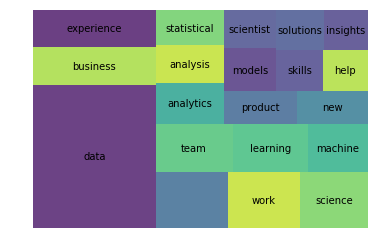

In [170]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [203]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]


In [212]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english',
                       ngram_range=(1,2),
                       max_df=.97,
                       min_df=.02,
                       tokenizer=tokenize)

# Create a vocabulary and get word counts for each document
dtm = tfidf.fit_transform(df['text'])

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View feature matrix as df
dtm.shape

(426, 2610)

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [214]:
# Calculate Distance of TF-IDF Vectors
from sklearn.metrics.pairwise import cosine_similarity

dist_matrix  = cosine_similarity(dtm)

In [215]:
df_dist_matrix = pd.DataFrame(dist_matrix)

In [216]:
df_dist_matrix.shape

(426, 426)

In [218]:
# Check for closest neighbors
df_dist_matrix[df_dist_matrix[0] < 1][0].sort_values(ascending=False)[:5]

42     0.191394
138    0.191394
338    0.173859
403    0.170600
115    0.159438
Name: 0, dtype: float64

In [226]:
print(df['text'][300][:150])

bWe are looking for an experienced Data Scientist to launch our new analytical framework for predicting consumer behavior in the mortgage buying proce


In [227]:
dtm.head()

,,analytics,data,1,1 year,10,100,12,12 months,2,...,years relevant,years work,yearsxe2x80x99,yearsxe2x80x99 experience,york,york city,youxe2x80x99ll,youxe2x80x99ll work,youxe2x80x99re,youxe2x80x99ve
0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.142498,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.054047,0.0,0.0,0.139382,0.08633,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.068972,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [228]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [230]:
# Check that these are the same neighbors
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 1.27169675, 1.27169675, 1.28541136, 1.28794386]]),
 array([[  0, 138,  42, 338, 403]]))

In [232]:
ideal_ds_job_description = [''' I'll take anything I can get ''']

ideal = tfidf.transform(ideal_ds_job_description)

In [233]:
nn.kneighbors(ideal.todense())

(array([[0.8181219 , 1.14083696, 1.2026678 , 1.2026678 , 1.20314931]]),
 array([[124, 169,  28,  12, 215]]))

In [234]:
# Inspect most relevant result
df['text'][124]

'bKeysight Marketing is hiring a data scientist to scale up insights that are a foundational element for Marketing transformation You will be part of the data analysts team whose goal is to build analytic capabilities that support the strategy planning and execution of Marketing activitiesnnYou will need to have a deep competency and strong experience with statistics modeling using data science tools and applying them to the real world of customer targeting and optimizing ROInnResponsibilitiesnYour focus will be generating customer insights the improve online and offline customer experience and targetingnYou will also focus on automating reporting that can be easily consumed by different stakeholdersnYou will consolidate validate and investigate big data from multiple sources to find and deliver actionable insights to business partners and to upper management to make informed business decisionsnYou will create datadriven attribution statistical models of Marketing touches and customer 

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 